In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# import data set
df= pd.read_csv(r'C:\Users\mateu\Desktop\CF\6.0\covid_19.csv')

In [4]:
df.shape

(155278, 44)

In [4]:
# check
df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,11565.595138,57664.07353,171.137304,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,11565.595138,57664.07353,171.137304,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,11565.595138,57664.07353,171.137304,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,11565.595138,57664.07353,171.137304,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,11565.595138,57664.07353,171.137304,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511


In [5]:
# renaming column
df.rename(columns= {'iso_code':'Country_Code'},inplace=True)
# droping column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
# check
df.head()

,Country_Code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,11565.595138,57664.07353,171.137304,172.673031,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,...,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511


In [6]:
# creating subset to save memory and time
df1 = df[['Country_Code','continent','location','total_cases','new_cases','total_deaths','population']]

In [7]:
# changing data type
df1[['total_cases','new_cases','total_deaths','population']] = df1[['total_cases','new_cases','total_deaths','population']].astype('int64')
# check
df1.head()


C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Country_Code,continent,location,total_cases,new_cases,total_deaths,population
0,AFG,Asia,Afghanistan,5,5,57664,39835428
1,AFG,Asia,Afghanistan,5,0,57664,39835428
2,AFG,Asia,Afghanistan,5,0,57664,39835428
3,AFG,Asia,Afghanistan,5,0,57664,39835428
4,AFG,Asia,Afghanistan,5,0,57664,39835428


In [8]:
# looking for odd values
df1.describe()

,total_cases,new_cases,total_deaths,population
count,1.552780e+05,1.552780e+05,155278.000000,1.552780e+05
mean,6.806585e+05,3.073286e+03,20461.413516,3.794377e+07
std,3.191948e+06,1.785251e+04,57225.221856,1.458631e+08
min,1.000000e+00,0.000000e+00,1.000000,4.700000e+01
25%,1.882000e+03,1.000000e+00,98.000000,8.903432e+05
50%,2.315300e+04,6.900000e+01,1203.000000,6.871547e+06
75%,2.568158e+05,8.760000e+02,16042.000000,2.578822e+07
max,7.926573e+07,1.368167e+06,958437.000000,1.444216e+09


In [9]:
# Check for missing values, This already has been done in previous exercise
df.isnull().sum()

Country_Code                             0
continent                                0
location                                 0
date                                     0
total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
total_deaths_per_million                 0
new_deaths_per_million                   0
reproduction_rate                        0
new_tests_per_thousand                   0
positive_rate                            0
tests_per_case                           0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                  0
total_boosters                           0
new_vaccinations                         0
total_vacci

##### Extreme values check

C:\Users\mateu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cases', ylabel='Density'>

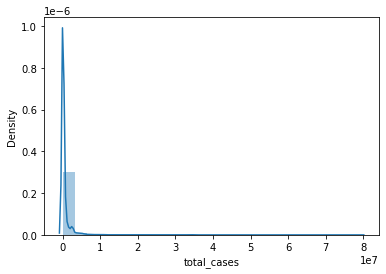

In [22]:

sns.distplot(df['total_cases'], bins=25) 

C:\Users\mateu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_cases', ylabel='Density'>

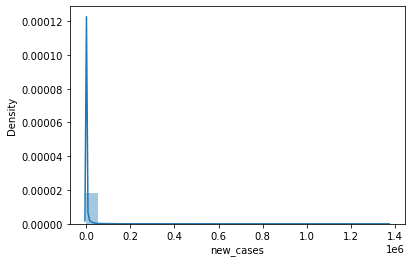

In [37]:
sns.distplot(df['new_cases'],bins=25)

C:\Users\mateu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_deaths', ylabel='Density'>

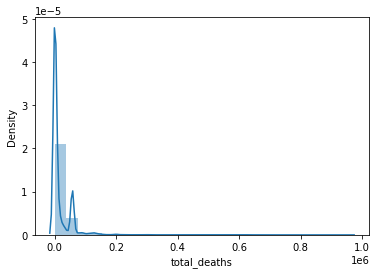

In [38]:
sns.distplot(df['total_deaths'],bins=25)

In [25]:
# Check the mean
df1['total_cases'].mean()

680658.5368435966

In [26]:
# Check the median
df1['total_cases'].median(),

(23153.0,)

In [27]:
# Check the max
df1['total_cases'].max() # Check the max

79265726

In [28]:
# Check the mean in new_cases column
df1['new_cases'].mean()

3073.2857004855805

In [29]:
# Check the median in new_cases column
df1['new_cases'].median()

69.0

In [30]:
# Check the median in new_cases column
df1['new_cases'].max()

1368167

In [32]:
# Check the mean in total_deaths column
df1['total_deaths'].mean()

20461.413516402838

In [33]:
# Check the median in total_deaths column
df1['total_deaths'].median()

1203.0

In [34]:
# Check the median in total_deaths column
df1['total_deaths'].max()

958437

### Data prep for regression analysis

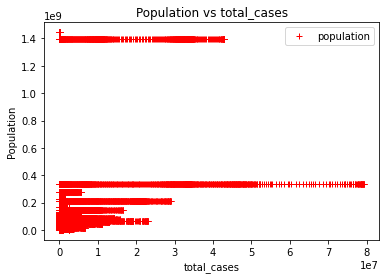

In [47]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. Population vs total_cases
df1.plot(x = 'total_cases', y='population',style='r+')
plt.title('Population vs total_cases')  
plt.xlabel('total_cases')  
plt.ylabel('Population')  
plt.show()

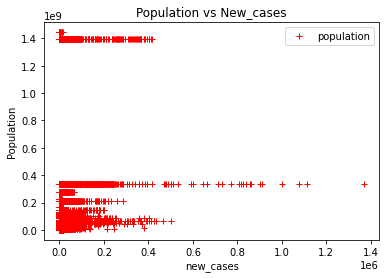

In [46]:
# 2. Population vs new_cases
df1.plot(x = 'new_cases', y='population',style='r+')
plt.title('Population vs New_cases')  
plt.xlabel('new_cases')  
plt.ylabel('Population')  
plt.show()

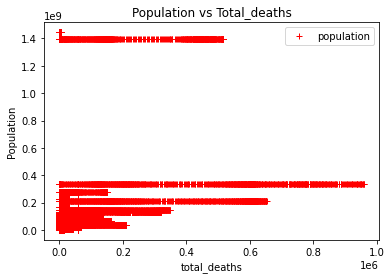

In [45]:
# 2. Population vs total_deaths
df1.plot(x = 'total_deaths', y='population',style='r+')
plt.title('Population vs Total_deaths')  
plt.xlabel('total_deaths')  
plt.ylabel('Population')  
plt.show()

#### Hypothesis: The higher the population, the higher the number of cases is


In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['population'].values.reshape(-1,1) # independent variable
Y = df1['total_cases'].values.reshape(-1,1)# dependent variable

In [30]:
# check
X

array([[39835428],
       [39835428],
       [39835428],
       ...,
       [15092171],
       [15092171],
       [15092171]], dtype=int64)

In [31]:
# check
Y

array([[     5],
       [     5],
       [     5],
       ...,
       [237503],
       [238739],
       [239019]], dtype=int64)

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

Xx = df1['population'].values.reshape(-1,1)
Yy = df1['new_cases'].values.reshape(-1,1)

In [33]:
Xx

array([[39835428],
       [39835428],
       [39835428],
       ...,
       [15092171],
       [15092171],
       [15092171]], dtype=int64)

In [34]:
Yy

array([[     5],
       [     5],
       [     5],
       ...,
       [237503],
       [238739],
       [239019]], dtype=int64)

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.

Xxx = df1['population'].values.reshape(-1,1)
Yyy = df1['total_deaths'].values.reshape(-1,1)

In [36]:
Xxx

array([[39835428],
       [39835428],
       [39835428],
       ...,
       [15092171],
       [15092171],
       [15092171]], dtype=int64)

In [37]:
Yyy

array([[57664],
       [57664],
       [57664],
       ...,
       [ 5396],
       [ 5397],
       [ 5397]], dtype=int64)

In [38]:
# Split data into a training set and a test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [39]:
# Split data into a training set and a test set.
Xx_train, Xx_test, Yy_train, Yy_test = train_test_split(Xx, Yy, test_size=0.3, random_state=0)

In [40]:
# Split data into a training set and a test set.
Xxx_train, Xxx_test, Yyy_train, Yyy_test = train_test_split(Xxx, Yyy, test_size=0.3, random_state=0)

####  Regression analysis

In [41]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, Y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

Y_predicted = regression.predict(X_test)

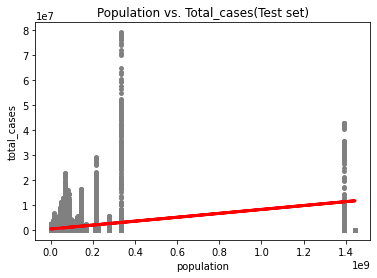

In [44]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, Y_test, color='gray', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =3)
plot_test.title('Population vs. Total_cases(Test set)')
plot_test.xlabel('population') # independent variable
plot_test.ylabel('total_cases') # dependent variable
plot_test.show()

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(Y_test, Y_predicted) # This is the mean squared error
r2 = r2_score(Y_test, Y_predicted) # This is the R2 score. 

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00782756]]
Mean squared error:  9550796916134.977
R2 score:  0.1204505949141551


I have a positive relationship, so the coefficient is positive. When the population grows, 
the number of total cases as well.Unfortunately, 
the MSE is very high so the regression line is not an exact representation of the data, but remember that a lot of data has been supplemented with the value of 0 and this could have had an impact on current result
R2 is 0.1204 which is a very bad fit.


In [47]:
Y_predicted

array([[ 456347.46809729],
       [ 456347.46809729],
       [ 404201.7986495 ],
       ...,
       [2032894.03865238],
       [ 378228.47182488],
       [ 850671.83723134]])

In [48]:
# Create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,743352,4.563475e+05
1,9281,4.563475e+05
2,9598,4.042018e+05
3,4927,4.166531e+05
4,606492,4.092936e+05
5,53868,5.800005e+05
6,222992,4.569104e+05
7,564778,8.506718e+05
8,7474,5.800005e+05
9,4273,4.182681e+05


##### Compare how the regression fits the training set

In [53]:
# Predict.

Y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [54]:
rmse = mean_squared_error(Y_train, Y_predicted_train)
r2 = r2_score(Y_train, Y_predicted_train)

In [55]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00782756]]
Mean squared error:  8573474560463.564
R2 score:  0.13409329307769524


The slope is the same and the R2 and MSE results are slightly better, but not much. The good news is that
I didn't overdo my model. Additionally, the information is also that the relationship
I explored isn’t purely linear.
The conclusion is that the size of the population does not influence the number of cases.

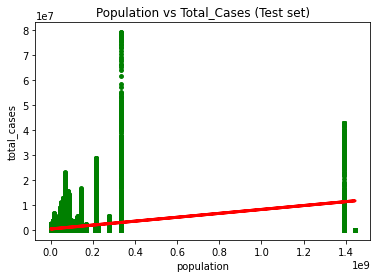

In [57]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, Y_train, color='green', s = 15)
plot_test.plot(X_train, Y_predicted_train, color='red', linewidth =3)
plot_test.title('Population vs Total_Cases (Test set)')
plot_test.xlabel('population')
plot_test.ylabel('total_cases')
plot_test.show()

### Population vs new_cases

In [66]:
# Predict.

Yy_predicted_train = regression.predict(Xx_train) # This is predicting X_train!

In [67]:
# Fit the regression object onto the training set.

regression.fit(Xx_train, Yy_train)

LinearRegression()

In [59]:
# Predict the values of y using X.

Yy_predicted = regression.predict(Xx_test)

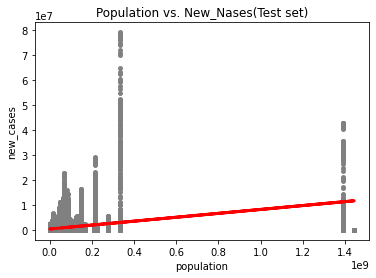

In [64]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xx_test, Yy_test, color='gray', s = 15)
plot_test.plot(Xx_test, Yy_predicted, color='red', linewidth =3)
plot_test.title('Population vs. New_Cases(Test set)')
plot_test.xlabel('population') # independent variable
plot_test.ylabel('new_cases') # dependent variable
plot_test.show()

In [69]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(Yy_test, Yy_predicted) # This is the mean squared error
r2 = r2_score(Yy_test, Yy_predicted) # This is the R2 score. 

In [70]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00782756]]
Mean squared error:  9550796916134.977
R2 score:  0.1204505949141551


Here the situation is as in the example above, even the results are identical

In [71]:
Yy_predicted

array([[ 456347.46809729],
       [ 456347.46809729],
       [ 404201.7986495 ],
       ...,
       [2032894.03865238],
       [ 378228.47182488],
       [ 850671.83723134]])

In [72]:
# Create a dataframe comparing the actual and predicted values of Yy.

data = pd.DataFrame({'Actual': Yy_test.flatten(), 'Predicted': Yy_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,743352,4.563475e+05
1,9281,4.563475e+05
2,9598,4.042018e+05
3,4927,4.166531e+05
4,606492,4.092936e+05
5,53868,5.800005e+05
6,222992,4.569104e+05
7,564778,8.506718e+05
8,7474,5.800005e+05
9,4273,4.182681e+05


#### Compare how the regression fits the training set

In [73]:
# Predict.

Yy_predicted_train = regression.predict(Xx_train) # This is predicting Xx_train!

In [74]:
rmse = mean_squared_error(Yy_train, Yy_predicted_train)
r2 = r2_score(Yy_train, Yy_predicted_train)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00782756]]
Mean squared error:  8573474560463.564
R2 score:  0.13409329307769524


The results also improved significantly, but also in this case everything is the same as in the example above.

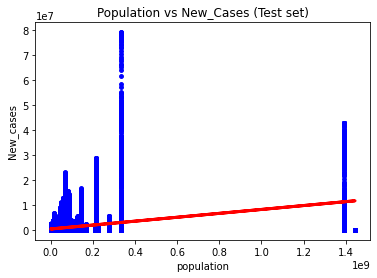

In [76]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(Xx_train, Yy_train, color='blue', s = 15)
plot_test.plot(Xx_train, Yy_predicted_train, color='red', linewidth =3)
plot_test.title('Population vs New_Cases (Test set)')
plot_test.xlabel('population')
plot_test.ylabel('New_cases')
plot_test.show()

#### Population vs total_deaths

###### Regression analysis

In [77]:
# Fit the regression object onto the training set.

regression.fit(Xxx_train, Yyy_train)

LinearRegression()

In [78]:
# Predict the values of y using X.

Yyy_predicted = regression.predict(Xxx_test)

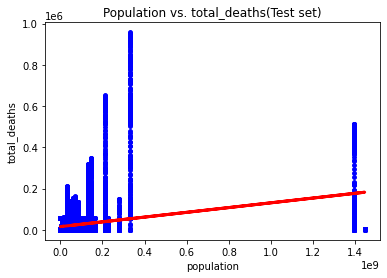

In [87]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xxx_test, Yyy_test, color='blue', s = 15)
plot_test.plot(Xxx_test, Yyy_predicted, color='red', linewidth =3)
plot_test.title('Population vs. total_deaths(Test set)')
plot_test.xlabel('population') # independent variable
plot_test.ylabel('total_deaths') # dependent variable
plot_test.show()

In [80]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(Yyy_test, Yyy_predicted) # This is the mean squared error
r2 = r2_score(Yyy_test, Yyy_predicted) # This is the R2 score. 

In [81]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00011548]]
Mean squared error:  3068178737.934051
R2 score:  0.08469797029820259


The result is positive so the higher the population the higher the death rate. It seems to be as logical as possible.
the result is positive so the higher the population, the higher the death rate.
Unfortunately, the MSE is very high so the regression line is not an exact representation of the data,
but the data has been supplemented with the average of deaths.
R2 is also very, is 0.084 so this is a very bad match

In [82]:
Yyy_predicted

array([[17129.24065968],
       [17129.24065968],
       [16359.94976047],
       ...,
       [40387.60404343],
       [15976.77232388],
       [22946.60098362]])

In [83]:
# Create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': Yyy_test.flatten(), 'Predicted': Yyy_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2151,17129.240660
1,64,17129.240660
2,10,16359.949760
3,63,16543.641060
4,8817,16435.067106
5,1006,18953.460780
6,5853,17137.544792
7,37700,22946.600984
8,102,18953.460780
9,27,16567.465655


#### Compare how the regression fits the training set

In [84]:
# Predict.

Yyy_predicted_train = regression.predict(Xxx_train) # This is predicting Xxx_train!

In [85]:
rmse = mean_squared_error(Yyy_train, Yyy_predicted_train)
r2 = r2_score(Yyy_train, Yyy_predicted_train)

In [86]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00011548]]
Mean squared error:  2952557847.2350416
R2 score:  0.08914338339038064


Slope has remained the same, but MSE and R2 have improved a bit, but still a bad match.

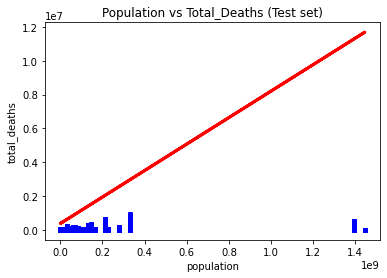

In [88]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(Xxx_train, Yyy_train, color='blue', s = 15)
plot_test.plot(X_train, Y_predicted_train, color='red', linewidth =3)
plot_test.title('Population vs Total_Deaths (Test set)')
plot_test.xlabel('population')
plot_test.ylabel('total_deaths')
plot_test.show()